# Data Dictionary:

* Pregnancies: Number of times pregnant

* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* BloodPressure: Diastolic blood pressure (mm Hg)

* SkinThickness: Triceps skin fold thickness (mm)

* Insulin: 2-Hour serum insulin (mu U/ml)

* BMI: Body mass index (weight in kg/(height in m)^2)

* DiabetesPedigreeFunction: Diabetes pedigree function

* Age: Age (years)

* Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

# Step 2:

Use the explore.ipynb notebook to find patterns and valuable information that will help on your cleaning process.

In [ ]:
df_raw.info()

In [ ]:
df_raw.sample(10)

In [ ]:
df_raw.describe()

### Filtrado del DataSet

In [ ]:
df_raw.hist(figsize=(12,12))
plt.show()

In [3]:
df_raw = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter = df_raw.copy()
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Step 3:

Now that you have a better knowledge of the data, in your exploratory notebook create a first decision tree model with your clean data.

In [4]:
## faltar sacar X e y
X= df_filter.iloc[:, :8]
y= df_filter.iloc[:, 8]

In [5]:
#Scale the features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.63502182,  0.84993279, -0.03237751, ...,  0.16456174,
         0.45842062,  1.41607523],
       [-0.85286102, -1.20026207, -0.51737031, ..., -0.85226209,
        -0.37269083, -0.19994691],
       [ 1.23017496,  1.98892994, -0.67903458, ..., -1.33162189,
         0.59392792, -0.11489311],
       ...,
       [ 0.33744525, -0.02872215, -0.03237751, ..., -0.9103663 ,
        -0.69188581, -0.28500071],
       [-0.85286102,  0.13399173, -1.00236311, ..., -0.34385017,
        -0.37871338,  1.16091384],
       [-0.85286102, -0.93991986, -0.19404178, ..., -0.30027201,
        -0.48109667, -0.88037728]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [10]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
print(f'El score del train es {score_train}')
print(f'El score del test es {score_test}')

El score del train es 1.0
El score del test es 0.6685082872928176


In [ ]:
plt.figure(figsize=(30,20))
tree.plot_tree(clf)
plt.show()

In [ ]:
#show predicted dataset
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(clf.predict(X_test))], axis=1)

In [ ]:
sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)), annot=True)
plt.show()

In [ ]:
#Print the classification report
print(classification_report(y_test, clf.predict(X_test)))

In [ ]:
#Get the number of leaves
print(clf.get_n_leaves())

In [ ]:
# Get your tree params

print(clf.get_params())

# Step 4:

Change your decision tree to use 'entropy' as criterion.

In [7]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
clf_entropy.score(X_train,y_train)

1.0

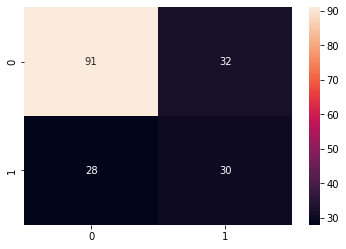

In [14]:
sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)), annot=True)
plt.show()

In [ ]:
print(classification_report(y_test, clf_entropy.predict(X_test)))

print(clf_entropy.get_n_leaves())

print(clf_entropy.get_params())

print(clf_entropy.get_depth())

# Step 5:

Hypertune your model using GridSearch to find the best hyperparameters.

Train your model with the optimal hyperparameters.

Again use the app.py to create your final machine learning model.

Save your final model in the 'models' folder.

In your README file write a brief summary of your cleaning and modeling process.

In [16]:
#Using Grid Search to get best hyperparameters

tree = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 3, 4]}
clf_CV = GridSearchCV(DecisionTreeClassifier(), tree, cv=5)
clf_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_split': [2, 3, 4]})

In [17]:
print(clf_CV.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4}


In [18]:
print(clf_CV.best_estimator_)

DecisionTreeClassifier(max_depth=6, min_samples_split=4)


In [19]:
score_train_CV = clf_CV.score(X_train, y_train)
score_test_CV = clf_CV.score(X_test, y_test)
print(f'El score del train es {score_train_CV}')
print(f'El score del test es {score_test_CV}')

El score del train es 0.8729281767955801
El score del test es 0.7348066298342542


In [22]:
filename = '/workspace/DECISION-TREE/models/finalized_model.sav' 
pickle.dump(clf_CV, open(filename, 'wb'))